In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['MAN', 'BMA']
di_sugar2= ['DManpa', 'DManpb']
link= '1-6'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [ ]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [4]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 94 files.


In [5]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 94 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [6]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [7]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 9323 
valid torsion1 and torsion2: (9323, 9323)


In [8]:
instant1.calc_BFactor()

In [9]:
instant1.find_bfmp_ring_shape()

(['7.e', '3.e'], ['4C1', '4C1'])
(['6.e', '3.e'], ['-', '4C1'])
(['4.e', '3.e'], ['BO3', '4C1'])
(['4.d', '3.d'], ['-', '-'])
(['5.d', '3.d'], ['-', '-'])
(['4.G', '3.G'], ['4C1', '-'])
(['5.G', '3.G'], ['-', '-'])
(['7.T', '3.T'], ['E1', '4C1'])
(['6.T', '3.T'], ['-', '4C1'])
(['4.T', '3.T'], ['4C1', '4C1'])
(['4.O', '3.O'], ['-', '4C1'])
(['5.O', '3.O'], ['5S1', '4C1'])
(['4.f', '3.f'], ['B25', '-'])
(['5.f', '3.f'], ['BO3', '-'])
(['4.M', '3.M'], ['-', '4C1'])
(['5.M', '3.M'], ['-', '4C1'])
(['4.S', '3.S'], ['-', '-'])
(['5.S', '3.S'], ['14B', '-'])
(['6.H', '3.H'], ['-', '4C1'])
(['4.H', '3.H'], ['4C1', '4C1'])
(['6.j', '3.j'], ['4C1', '4C1'])
(['4.j', '3.j'], ['-', '4C1'])
(['4.k', '3.k'], ['OS2', '-'])
(['5.k', '3.k'], ['-', '-'])
(['6.Z', '3.Z'], ['-', '4C1'])
(['4.Z', '3.Z'], ['4C1', '4C1'])
(['6.N', '3.N'], ['-', '4C1'])
(['4.N', '3.N'], ['-', '4C1'])
(['4.i', '3.i'], ['-', '4C1'])
(['5.i', '3.i'], ['-', '4C1'])
(['4.Y', '3.Y'], ['-', '4C1'])
(['5.Y', '3.Y'], ['14B', '4C1'])
(

In [10]:
output_df = instant1.match_glycan_tree()

../../pdbs//1zpu.pdb e MAN 7 C1
../../pdbs//1zpu.pdb e BMA 3 O6
26836 26802
No connection found between 26836 and 26802
0
../../pdbs//1zpu.pdb e MAN 6 C1
../../pdbs//1zpu.pdb e BMA 3 O6
26825 26802
No connection found between 26825 and 26802
1
../../pdbs//1zpu.pdb e MAN 4 C1
../../pdbs//1zpu.pdb e BMA 3 O6
26803 26802
Connection found between(2) 26803 and 26802
../../pdbs//1zpu.pdb d MAN 4 C1
../../pdbs//1zpu.pdb d BMA 3 O6
26742 26741
No connection found between 26742 and 26741
3
../../pdbs//1zpu.pdb d MAN 5 C1
../../pdbs//1zpu.pdb d BMA 3 O6
26753 26741
Connection found between(2) 26753 and 26741
../../pdbs//1zpu.pdb G MAN 4 C1
../../pdbs//1zpu.pdb G BMA 3 O6
25570 25569
No connection found between 25570 and 25569
5
../../pdbs//1zpu.pdb G MAN 5 C1
../../pdbs//1zpu.pdb G BMA 3 O6
25581 25569
Connection found between(2) 25581 and 25569
../../pdbs//1zpu.pdb T MAN 7 C1
../../pdbs//1zpu.pdb T BMA 3 O6
26264 26230
No connection found between 26264 and 26230
7
../../pdbs//1zpu.pdb T MAN 6 C

In [11]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [12]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [13]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [14]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,1zpu.pdb,e MAN 4 C2 C1 BMA 3 O6 C6,e MAN 4 C1 BMA 3 O6 C6 C5,129.2420,226.726,"([MAN(4_e_), BMA(3_e_)], [80.42, 87.3])",MAN(6_e_)-[MAN(5_e_)]-MAN(4_e_)-[MAN(7_e_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([4.e, 3.e], [BO3, 4C1])"
1,1zpu.pdb,d MAN 5 C2 C1 BMA 3 O6 C6,d MAN 5 C1 BMA 3 O6 C6 C5,240.0930,258.210,"([MAN(5_d_), BMA(3_d_)], [89.24, 83.89])",MAN(5_d_)-[MAN(4_d_)]-BMA(3_d_)-NAG(2_d_)-NAG(...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4DGlcp...,"([5.d, 3.d], [-, -])"
2,1zpu.pdb,G MAN 5 C2 C1 BMA 3 O6 C6,G MAN 5 C1 BMA 3 O6 C6 C5,264.9376,259.555,"([MAN(5_G_), BMA(3_G_)], [92.45, 84.59])",MAN(5_G_)-[MAN(4_G_)]-BMA(3_G_)-NAG(2_G_)-NAG(...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4DGlcp...,"([5.G, 3.G], [-, -])"
3,1zpu.pdb,T MAN 4 C2 C1 BMA 3 O6 C6,T MAN 4 C1 BMA 3 O6 C6 C5,187.7280,178.942,"([MAN(4_T_), BMA(3_T_)], [77.14, 82.7])",MAN(6_T_)-[MAN(5_T_)]-MAN(4_T_)-[MAN(7_T_)]-BM...,DManpa1-3[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([4.T, 3.T], [4C1, 4C1])"
4,1zpu.pdb,O MAN 5 C2 C1 BMA 3 O6 C6,O MAN 5 C1 BMA 3 O6 C6 C5,227.5260,130.248,"([MAN(5_O_), BMA(3_O_)], [75.18, 72.69])",MAN(5_O_)-[MAN(4_O_)]-BMA(3_O_)-NAG(2_O_)-NAG(...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4DGlcp...,"([5.O, 3.O], [5S1, 4C1])"
...,...,...,...,...,...,...,...,...,...
4601,7t4g.pdb,r MAN 7 C2 C1 BMA 3 O6 C6,r MAN 7 C1 BMA 3 O6 C6 C5,263.7312,168.210,"([MAN(7_r_), BMA(3_r_)], [100.88, 83.65])",MAN(7_r_)-[MAN(6_r_)-MAN(5_r_)-MAN(4_r_)]-BMA(...,DManpa1-2DManpa1-2DManpa1-3[DManpa1-6]DManpb1-...,"([7.r, 3.r], [4C1, 4C1])"
4602,4z7n.pdb,I MAN 5 C2 C1 BMA 3 O6 C6,I MAN 5 C1 BMA 3 O6 C6 C5,236.4250,160.580,"([MAN(5_I_), BMA(3_I_)], [100.94, 92.5])",MAN(5_I_)-[MAN(4_I_)]-BMA(3_I_)-NAG(2_I_)-NAG(...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4DGlcp...,"([5.I, 3.I], [4C1, 4C1])"
4603,6aor.pdb,C MAN 5 C2 C1 BMA 3 O6 C6,C MAN 5 C1 BMA 3 O6 C6 C5,147.8070,185.022,"([MAN(5_C_), BMA(3_C_)], [72.2, 57.17])",MAN(5_C_)-[MAN(4_C_)]-BMA(3_C_)-NAG(2_C_)-NAG(...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4DGlcp...,"([5.C, 3.C], [4C1, 4C1])"
4604,6hzn.pdb,C MAN 5 C2 C1 BMA 3 O6 C6,C MAN 5 C1 BMA 3 O6 C6 C5,34.7775,176.143,"([MAN(5_C_), BMA(3_C_)], [127.26, 119.66])",MAN(5_C_)-[MAN(4_C_)]-BMA(3_C_)-NAG(2_C_)-NAG(...,DManpa1-3[DManpa1-6]DManpb1-4DGlcpNAcb1-4DGlcp...,"([5.C, 3.C], [-, 4C1])"


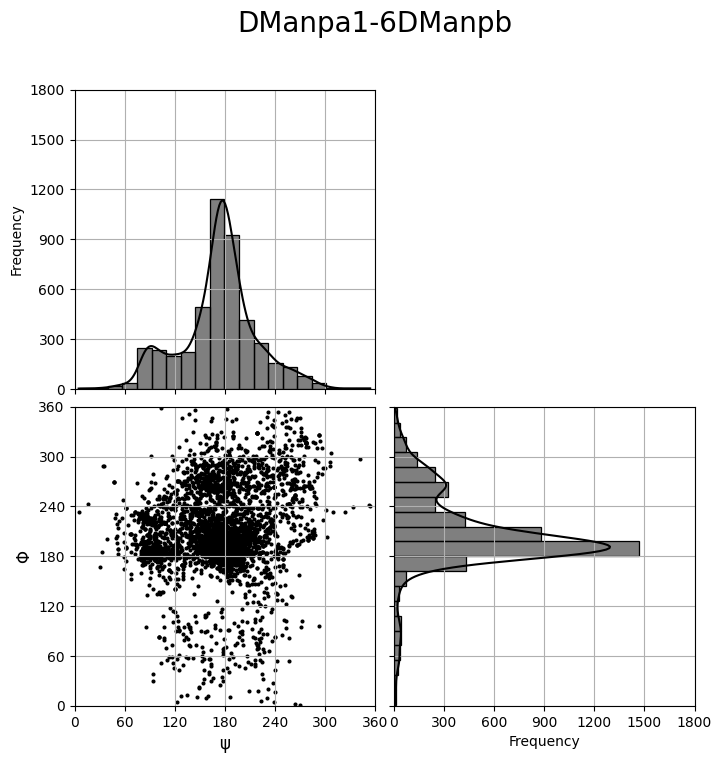

In [18]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=1800,step_histogram_tick=300)